## MLR Model#4

- [BACK TO TEST DATASET - Clean file](SamayShah_Project2(TEST)_DataCleaning_Test_Dataset.ipynb)
- [BACK TO TRAIN DATASET - Clean file](SamayShah_Project2(Main_TRAIN)_DataCleaning_Train_Dataset.ipynb)
- [TRAIN USING MODEL#1 - check Crossvalidation using Ridge and Lasso Models](SamayShah_MODEL%231_for_demo_purpose.ipynb)

In [1]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy import stats

## For additional testing
from sklearn.linear_model import LassoCV, RidgeCV

%matplotlib inline

## Plot only 2 digits after the decimal point
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
## backup of full dataset in case we need it later

originaldf = pd.read_csv('datasets/v3_clean_nooutliers.csv')

In [3]:
## Import Dataset for Model#4

df4 = pd.read_csv('datasets/model4_withdummies.csv')

In [4]:
## Import Test Dataset - for final export

df4_testdata = pd.read_csv('./datasets/Test/Test_model4_withdummies.csv')

In [5]:
## Selected Features needed for this Model#4

## Backward Selection Approach

inputcols = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Bsmt Qual',
       'Bsmt Exposure', 'Total Bsmt SF', 'Heating QC', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'Street_isPaved', 'Lotshape_isRegular',
       'isSlopeNormal', 'is_remodeled', 'is_roofGable', 'hasgood_Exterior',
       'is_fullfurnished', 'has_centralAir', 'total_full_baths',
       'total_half_baths', 'has_1pluskitchen', 'has_paveddriveway', 'has_pool',
       'has_Porch', 'isNeigh_collgcr_oldtown', 
       'Sale Type_New Home', 'proximity_to_veryClose', 'House_style_1_story',
       'House_style_Splitlevel', 'house_age_Contemporary',
       'house_age_Medieval', 'house_age_Stone-age','Foundation_PConc']

#'is_densityHigh',

### Multiple Linear Regression

In [6]:
## For this model - 'Lot Area', 'Total Bsmt SF', 'Bedroom AbvGr' + most of dummy variables
targets4 = df4['log_SalePrice']

## Inputs everything except the target & SalePrice
inputs4 = df4[inputcols]

## Final Test dataset
tinput = df4_testdata[inputcols]

In [7]:
inputs4.shape

(1972, 34)

In [8]:
tinput.shape

(843, 34)

In [9]:
## Using statsmodel tp get p-value summary

In [10]:
Input = sm.add_constant(inputs4)

In [11]:
results = sm.OLS(targets4,Input).fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     558.4
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:07:53   Log-Likelihood:                 1387.4
No. Observations:                1972   AIC:                            -2705.
Df Residuals:                    1937   BIC:                            -2509.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       9.9637      0.063    159.150      0.000       9.841      10.086
Lot Frontage                0.0011      0.000      5.766      0.000       0.001       0.002
Lot Area                 1.314e-05    1.1e-06     11.958      0.000     1.1e-05    1.53e-05
Overall Qual                0.0768      0.004     21.151      0.000       0.070       0.084
Overall Cond                0.0451      0.003     13.908      0.000       0.039       0.051
Bsmt Qual                   0.0309      0.007      4.403      0.000       0.017       0.045
Bsmt Exposure               0.0163      0.003      4.876      0.000       0.010       0.023
Total Bsmt SF               0.0002   1.24e-05     19.098      0.000       0.000       0.000
Heating QC                  0.0178      0.004      4.556      0.000       0.010       0.025
Bedroom AbvGr               0.0191      0.004      4.419      0.000       0.011       0.028
Fireplaces                  0.0580      0.005     10.719      0.000       0.047       0.069
Garage Cars                 0.0467      0.005      9.167      0.000       0.037       0.057
Street_isPaved              0.2733      0.051      5.368      0.000       0.173       0.373
Lotshape_isRegular         -0.0137      0.006     -2.148      0.032      -0.026      -0.001
isSlopeNormal              -0.0360      0.014     -2.504      0.012      -0.064      -0.008
is_remodeled                0.0194      0.010      1.845      0.065      -0.001       0.040
is_roofGable               -0.0163      0.007     -2.203      0.028      -0.031      -0.002
hasgood_Exterior            0.0595      0.018      3.221      0.001       0.023       0.096
is_fullfurnished            0.2981      0.030     10.020      0.000       0.240       0.356
has_centralAir              0.0293      0.013      2.188      0.029       0.003       0.056
total_full_baths            0.0653      0.005     12.979      0.000       0.055       0.075
total_half_baths            0.0393      0.006      6.125      0.000       0.027       0.052
has_1pluskitchen           -0.0755      0.016     -4.713      0.000      -0.107      -0.044
has_paveddriveway           0.0730      0.012      6.119      0.000       0.050       0.096
has_pool                    0.2093      0.050      4.187      0.000       0.111       0.307
has_Porch                   0.0191      0.007      2.853      0.004       0.006       0.032
isNeigh_collgcr_oldtown    -0.0401      0.007     -5.731      0.000      -0.054      -0.026
Sale Type_New Home          0.0528      0.012      4.525      0.000       0.030       0.076
proximity_to_veryClose     -0.0597      0.009     -6.640      0.000      -0.077      -0.042
House_style_1_story        -0.0897      0.009     -9.547      0.000      -0.108      -0.071
House_style_Splitlevel     -0.0792      0.013  

### Train Test Split

In [13]:
## Trial-and-error for test_size (our dataset is not that huge, so better keep a smaller test set)

x_train, x_test, y_train, y_test = train_test_split(inputs4, targets4, test_size=0.20, random_state=42)

### Scale the data

In [14]:
## Create standard scaler object

scaler4 = StandardScaler()

In [15]:
## Fit and Transform using mean and SD feature-wise for input training data and
## scale the test input for training data using same mean and SD.

## train+test split from our Train dataset
x_train_scaled = scaler4.fit_transform(x_train)
x_test_scaled = scaler4.transform(x_test) ##Transform using same fit info stored in scaler4 instance.

## Test dataset - input to transform
tinput_scaled = scaler4.transform(tinput) ##Transform using same fit info stored in scaler4 instance.

### Create Regression

In [16]:
## Create Linear Regression object

reg4 = LinearRegression() ## Initiate
reg4.fit(x_train_scaled,y_train) ## Fit
y_hat = reg4.predict(x_train_scaled) ## Predict - outputs for train set

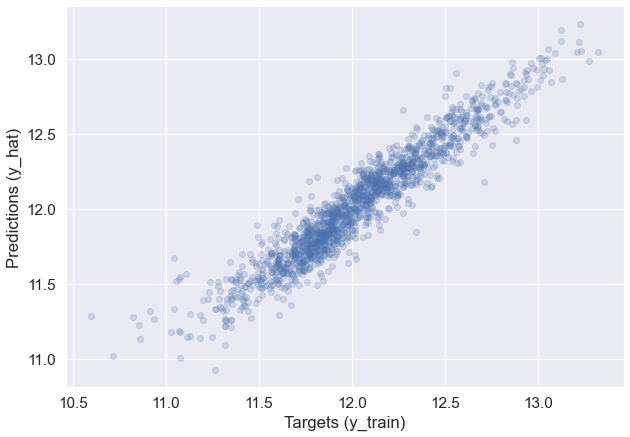

In [17]:
## Compare the targets and predictions for 'Train' set - scatterplot

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
plt.scatter(y_train,y_hat,alpha=0.2)
sns.set(font_scale=1.4)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)');

## More values on the lower side => model predicts lower values as price increases

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


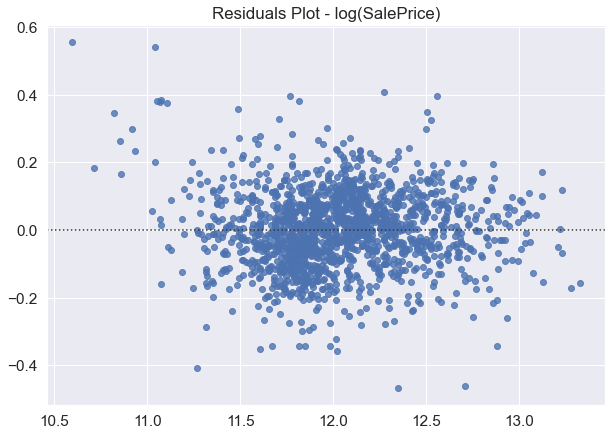

In [18]:
## Residual Error Plot - log(SalePrice)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
#plt.scatter(y_hat,(y_train-y_hat))
sns.residplot(y_train,y_hat)
plt.xlabel('')
plt.title('Residuals Plot - log(SalePrice)');

## Data is almost evenly distibuted for all predicted values, we do not notice much random error! 
## Homoscedacity = I see consistent variance on both sides of the line

## ## little more negative values - indicates y_hat > y_train => Higher Predicted values, but not so much

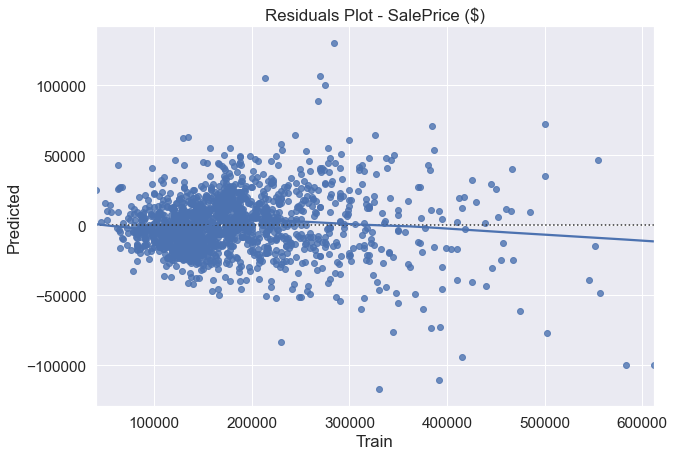

In [19]:
## Residual Error Plot - np.exp(SalePrice)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.residplot(np.exp(y_train),np.exp(y_hat),lowess=True) #lowess Smoother helps determine structure of the residuals
#plt.axhline(0,color='r')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.title('Residuals Plot - SalePrice ($)');

## Data is almost evenly distibuted for all predicted values, we do not notice much random error! 
## Homoscedacity = I see consistent variance on both sides of the line

# -ve values for y_train-y_hat as SalePrices increase 
# => Model gives higher predictions as SalesPrices increase as compared to houses with lower SalePrice

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


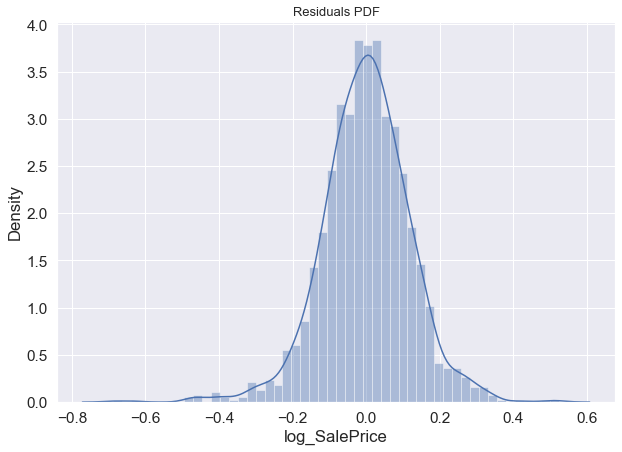

In [20]:
## Residual distribution - to check for anomalies

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',size=13);

##### ~Normally distributed!
## More values on the negative side - Again this confirms that our predictions are higher compared to training data

### Evaluating this model - train set

In [21]:
reg4.score(x_train_scaled,y_train)

0.906428391859603

In [22]:
## To calculate R2_adj later
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [23]:
## Calculate all major metrics

def lord_of_the_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [24]:
lord_of_the_metrics(y_train, y_hat, inputs4.shape[1])

Mean squared error      =  0.014427692484988411
Root mean squared error =  0.12011532993331206
Median absolute error   =  0.0712557202935038
R^2                     =  0.906428391859603
Adjusted R^2            =  0.9043652046502817


In [25]:
reg4.score(x_train_scaled,y_train)

## Over 90.0% of the variability in our  𝑌  (Sale Price) is explained by our model,
## relative to a baseline model with no predictors.

0.906428391859603

In [26]:
cross_val_score(reg4, x_train_scaled, y_train, cv=KFold(n_splits=10,shuffle=True)).mean()

##KFold just forces that we do not want stratified separation of data, ratio preservation is not important
## Cross_val_score is just a helper function on estimator and dataset

0.8956251026506351

### <font color='red'>Result#1: To compare, our training RMSE = 0.1203433526623702</font>

### Finding Coefs & Intercepts

In [27]:
## y-intercept: If all the features were 0, the min price for a house would still be ~$167,644

beta0 = reg4.intercept_
beta0

12.029599470109831

In [28]:
np.exp(reg4.intercept_)

167644.25275733473

In [29]:
## Weights for different features, tells us how important that feature is.

beta1 = reg4.coef_
beta1

array([ 0.02107918,  0.04362889,  0.10686333,  0.0482782 ,  0.02303747,
        0.01574422,  0.10324773,  0.01763524,  0.01875923,  0.0338214 ,
        0.03446781,  0.00718539, -0.00632442, -0.00790174,  0.00663704,
       -0.00497052,  0.00524963,  0.04469886,  0.00778329,  0.04758071,
        0.02267844, -0.01537274,  0.01987708,  0.01545058,  0.00847731,
       -0.0180723 ,  0.01616992, -0.01779538, -0.04478498, -0.01780114,
        0.03721735,  0.02174697, -0.01132065,  0.01326456])

In [30]:
y_test.shape

(395,)

In [31]:
## reg4 summary table with coefficients and features names - for easy interpretation

reg4_summary = pd.DataFrame(inputs4.columns.values, columns=['Features'])
reg4_summary['Coefficients'] = reg4.coef_

reg4_summary

## Helpful in creating inferences like
## Lot Area, Overall Condition, is_fullyfurnished, # of bathrooms, ishouse_contemporary (made after 1999) are
## more significant in predicting house prices than others. 

,Features,Coefficients
0,Lot Frontage,0.02
1,Lot Area,0.04
2,Overall Qual,0.11
3,Overall Cond,0.05
4,Bsmt Qual,0.02
5,Bsmt Exposure,0.02
6,Total Bsmt SF,0.10
7,Heating QC,0.02
8,Bedroom AbvGr,0.02
9,Fireplaces,0.03


### Test-1

In [32]:
## Predict outputs for Test set

y_hat_test = reg4.predict(x_test_scaled)

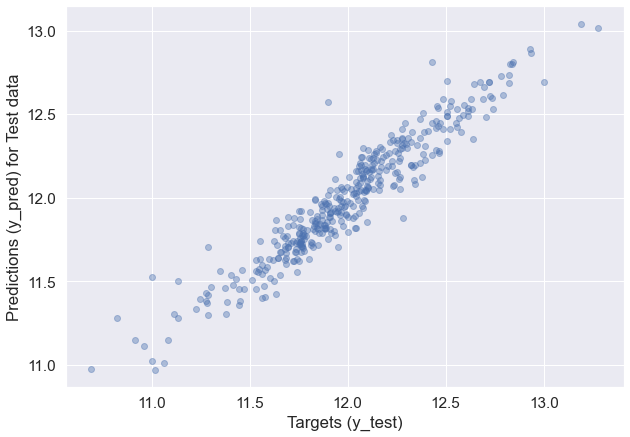

In [33]:
## Compare the targets and predictions for 'Test' set - scatterplot

plt.figure(figsize=(10,7))
plt.scatter(y_test,y_hat_test,alpha=0.4)
sns.set(font_scale=1.4)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_pred) for Test data');

## More values on the lower side => model predicts lower values as price increases

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


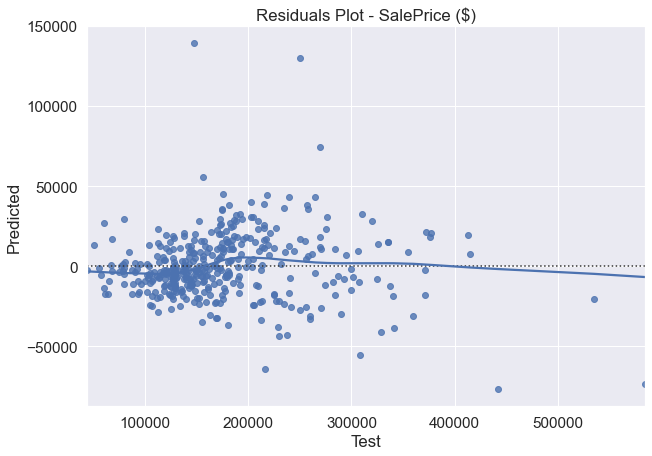

In [34]:
## Residual Error Plot - np.exp(SalePrice)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.residplot(np.exp(y_test),np.exp(y_hat_test),lowess=True) #lowess Smoother helps determine structure of the residuals
#plt.axhline(0,color='r')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.title('Residuals Plot - SalePrice ($)');

## Data is almost evenly distibuted for all predicted values, we do not notice much random error! 
## Homoscedacity = I see consistent variance on both sides of the line

# -ve values for y_train-y_hat as SalePrices increase 
# => Model gives higher predictions as SalesPrices increase as compared to houses with lower SalePrice
# There are some outliers though, where model predicted $100,000 than its actual value

In [35]:
lord_of_the_metrics(y_test, y_hat_test, inputs4.shape[1])

Mean squared error      =  0.014505610645402655
Root mean squared error =  0.1204392404717111
Median absolute error   =  0.06963519898172166
R^2                     =  0.907311874294196
Adjusted R^2            =  0.8985579957553145


In [36]:
reg4.score(x_test_scaled,y_test)

## Interpretation:
## Over 90.0% of the variability in our  𝑌  (Sale Price) is explained by our model,
## relative to a baseline model with no predictors.

0.907311874294196

In [37]:
cross_val_score(reg4, x_test_scaled, y_test, cv=KFold(n_splits=10,shuffle=True)).mean()

##KFold just forces that we do not want stratified separation of data, ratio preservation is not important
## Cross_val_score is just a helper function on estimator and dataset

0.8852577371858951

In [38]:
## Training cross_val_score

lord_of_the_metrics(y_train, y_hat, inputs4.shape[1])

Mean squared error      =  0.014427692484988411
Root mean squared error =  0.12011532993331206
Median absolute error   =  0.0712557202935038
R^2                     =  0.906428391859603
Adjusted R^2            =  0.9043652046502817


In [39]:
## As the Model is not overfit or too complex, regularization using L1 Norm / L2 Norm is not essential

### <font color='red'>Result#1: To compare, our training RMSE = 0.12011532993331206</font>

### <font color='red'>Result#2: To compare, our test RMSE = 0.1204392404717111</font>

In [40]:
compare_original_prices = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
compare_original_prices.head()

,Predictions
0,294767.46
1,169717.40
2,91292.23
3,134127.28
4,241923.74


In [41]:
## New Column with np.exp(y_test) to inverse the log base e

compare_original_prices['Target'] = np.exp(y_test)
compare_original_prices

## Consists of a lot of missing values, appears to be some kind of indexing error

,Predictions,Target
0,294767.46,nan
1,169717.40,nan
2,91292.23,nan
3,134127.28,nan
4,241923.74,nan
...,...,...
390,171045.46,nan
391,266348.31,nan
392,177777.02,nan
393,288405.87,127000.00


In [42]:
## Reset Index
y_test = y_test.reset_index(drop=True)
y_test.head()

0   12.63
1   12.10
2   11.64
3   11.79
4   12.58
Name: log_SalePrice, dtype: float64

In [43]:
## New Column with np.exp(y_test) to inverse the log base e

compare_original_prices['Target'] = np.exp(y_test)
compare_original_prices

,Predictions,Target
0,294767.46,306000.00
1,169717.40,179000.00
2,91292.23,113000.00
3,134127.28,132000.00
4,241923.74,290000.00
...,...,...
390,171045.46,178900.00
391,266348.31,269500.00
392,177777.02,190000.00
393,288405.87,147000.00


In [44]:
## Add Calculated Residual Column and calculate the difference in %

compare_original_prices['Residual'] = compare_original_prices['Target'] - compare_original_prices['Predictions']
compare_original_prices['Difference%'] = np.absolute(compare_original_prices['Residual'] / compare_original_prices['Target'] * 100)
compare_original_prices.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
182,180041.38,180000.00,-41.38,0.02
145,167973.94,167900.00,-73.94,0.04
328,190650.67,190550.00,-100.67,0.05
183,148583.32,148500.00,-83.32,0.06
187,159118.58,159000.00,-118.58,0.07
...,...,...,...,...
250,367087.47,250000.00,-117087.47,46.83
336,121466.28,80000.00,-41466.28,51.83
357,79436.68,50138.00,-29298.68,58.44
219,101568.74,60000.00,-41568.74,69.28


In [45]:
##Descriptive Stats for additional Insights

compare_original_prices.describe()

,Predictions,Target,Residual,Difference%
count,395.00,395.00,395.00,395.00
mean,173280.12,175198.63,1918.50,8.97
std,66394.65,73533.81,23469.29,9.41
min,58166.15,44000.00,-141405.87,0.02
25%,125874.24,127500.00,-10176.22,2.88
50%,157837.73,159500.00,598.74,6.99
75%,206954.28,206500.00,10621.64,12.42
max,461151.47,584500.00,133862.29,96.19


## Available Test set (Model#4: Process) 

In [46]:
## Final Predictions

y_testpred = reg4.predict(tinput_scaled)

In [47]:
finalresult = pd.DataFrame(index=df4_testdata['Id'])

In [48]:
finalresult['SalePrice '] = np.exp(y_testpred)

In [49]:
finalresult

,SalePrice
Id,
2658,135411.00
2718,156617.92
2414,254079.31
1989,104358.65
625,186612.68
...,...
1662,191745.64
1234,215992.11
1373,114764.44


In [50]:
finalresult.to_csv('Model4_Predicted_SalePrices_Test_Dataset.csv')

- [Back TO TOP](#MLR-Model#4)